In [1]:
# Import necessary libraries
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler

# --- Define Paths ---
# Define the base directory where your original files are located
original_data_dir = r'C:\Users\HomePC\Downloads\spambase'

# Define the new directory for transformed data
# This is where your spambase.csv will be saved
transformed_data_dir = r'C:\Users\HomePC\Downloads\spambase_transformed'

# Define the full paths to your original data and names files
data_file_path = os.path.join(original_data_dir, 'spambase.data')
names_file_path = os.path.join(original_data_dir, 'spambase.names')

# Define the full path for the output CSV file in the new transformed directory
output_csv_file_name = 'spambase.csv'
output_csv_file_path_csv_creation = os.path.join(transformed_data_dir, output_csv_file_name)

# --- Create the transformed data directory if it doesn't exist ---
if not os.path.exists(transformed_data_dir):
    os.makedirs(transformed_data_dir)
    print(f"Created directory for transformed data: {transformed_data_dir}")
else:
    print(f"Directory for transformed data already exists: {transformed_data_dir}")

# --- Step 1: Read the .names file to extract column headers ---
# The spambase.names file has a specific format.
# We're looking for lines that define attributes (e.g., 'word_freq_make: continuous.').
# The last line of the names file usually defines the class label.

column_names = []
try:
    with open(names_file_path, 'r') as f:
        for line in f:
            line = line.strip()
            # Skip empty lines and lines that are comments (start with '|')
            if not line or line.startswith('|'):
                continue

            # Check for attribute definitions (e.g., 'attribute_name: type.')
            if ':' in line:
                # Extract the name before the colon
                name = line.split(':')[0].strip()
                # Exclude the "1," line which is part of the class definition in spambase.names
                if name != "1":
                    column_names.append(name)
            elif line == '0, 1.': # This line indicates the start of class labels for spambase
                # The last column is the class label for spam/not spam
                column_names.append('is_spam') # Or 'Class' as per common convention
                break # We've read all necessary names
            # Add a break condition if we hit the end of attribute definitions
            # (e.g., a line like '1, 0.')
            elif line.startswith('1,'):
                column_names.append('is_spam')
                break

except FileNotFoundError:
    print(f"Error: The .names file was not found at {names_file_path}")
    print("Please ensure the file exists and the path is correct.")
    # Fallback to exit if crucial file is missing
    exit()
except Exception as e:
    print(f"An error occurred while reading the .names file: {e}")
    # Fallback: If parsing fails, use a predefined set of column names for Spambase
    print("Falling back to a predefined set of column names for Spambase due to parsing error.")
    column_names = [
        'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
        'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
        'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
        'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
        'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
        'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
        'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
        'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
        'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
        'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
        'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
        'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
        'char_freq_semicolon', 'char_freq_paren', 'char_freq_bracket', 'char_freq_exclamation',
        'char_freq_dollar', 'char_freq_hash', 'capital_run_length_average',
        'capital_run_length_longest', 'capital_run_length_total', 'is_spam'
    ]

if not column_names or len(column_names) != 58: # Basic check for expected number of columns
    print("Warning: Column name extraction might be incomplete or failed. Using a robust default set for Spambase.")
    column_names = [
        'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
        'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
        'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
        'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
        'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
        'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
        'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
        'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
        'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
        'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
        'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
        'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
        'char_freq_semicolon', 'char_freq_paren', 'char_freq_bracket', 'char_freq_exclamation',
        'char_freq_dollar', 'char_freq_hash', 'capital_run_length_average',
        'capital_run_length_longest', 'capital_run_length_total', 'is_spam'
    ]


print(f"Extracted {len(column_names)} column names from '{names_file_path}'.")

# --- Step 2: Read the .data file into a pandas DataFrame and save as CSV ---
# The spambase.data file is comma-separated and has no header.
try:
    df_raw = pd.read_csv(data_file_path, header=None, names=column_names)
    print(f"\nSuccessfully read raw data from '{data_file_path}'.")

    # Save the DataFrame to a CSV file in the new directory
    df_raw.to_csv(output_csv_file_path_csv_creation, index=False) # index=False prevents writing the DataFrame index as a column
    print(f"Raw data converted to CSV and saved to '{output_csv_file_path_csv_creation}'.")
    print(f"Original files remain in '{original_data_dir}'.")

except FileNotFoundError:
    print(f"Error: The .data file was not found at {data_file_path}")
    print("Please ensure the file exists and the path is correct.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the .data file or saving to CSV: {e}")
    print("Please check the delimiter and file format. Defaulting to comma-separated.")
    exit()


# --- Step 3: Load the newly created spambase.csv for analysis ---
# Define the path to load the CSV from the transformed directory
load_csv_file_path = os.path.join(transformed_data_dir, output_csv_file_name)

print(f"\nAttempting to load the transformed CSV for analysis from: {load_csv_file_path}")

try:
    df = pd.read_csv(load_csv_file_path)
    print("Dataset (spambase.csv) loaded successfully for analysis!")

    # --- Initial Data Inspection ---
    print("\n--- First 5 rows of the loaded dataset ---")
    print(df.head()) # Display the first 5 rows

    print("\n--- Basic Info about the dataset ---")
    df.info() # Get a summary of the DataFrame

    print("\n--- Descriptive Statistics ---")
    print(df.describe()) # Get descriptive statistics

except FileNotFoundError:
    print(f"Error: The transformed CSV file '{load_csv_file_path}' was not found.")
    print("Please ensure the previous steps completed successfully and the path is correct.")
except Exception as e:
    print(f"An error occurred while loading the transformed dataset: {e}")


# --- Step 4: Clean the Dataset (Missing Values, Inconsistent Formats, Outliers) ---

# Check for missing values
print("\n--- Missing values before cleaning ---")
print(df.isnull().sum())
print("\nAs expected, the Spambase dataset typically has no missing values, so no imputation is needed.")

# Inconsistent formats:
# Spambase features are all numerical (float or int), so inconsistent formats are not usually an issue.
print("\nAll data types are numerical, so no inconsistent format handling is required.")

# Outlier Handling:
# For the Spambase dataset, outliers often represent legitimate, albeit extreme, email characteristics.
# We will visualize them during EDA to understand their distribution, but typically won't remove them directly.
print("\nOutlier detection will be part of the EDA phase to understand their distribution, but no removal will be performed at this stage unless data errors are clearly identified.")


# --- Step 5: Feature Scaling (a key data transformation) ---
# Many machine learning algorithms perform better when numerical input features are scaled.

# Separate features (X) and target (y)
# The last column 'is_spam' is our target variable.
X = df.drop('is_spam', axis=1)
y = df['is_spam']

print(f"\nFeatures (X) shape before scaling: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for easier handling and viewing
# This also preserves the column names for X
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\n--- First 5 rows of scaled features (X_scaled_df) ---")
print(X_scaled_df.head())

print("\nSummary statistics of scaled features (mean should be close to 0, std dev close to 1):")
print(X_scaled_df.describe())

print("\nDataset Cleaning and Transformation (Feature Scaling) complete.")
print("The 'X_scaled_df' DataFrame now holds our scaled features, and 'y' holds the target variable.")

Directory for transformed data already exists: C:\Users\HomePC\Downloads\spambase_transformed
Extracted 58 column names from 'C:\Users\HomePC\Downloads\spambase\spambase.names'.

Successfully read raw data from 'C:\Users\HomePC\Downloads\spambase\spambase.data'.
Raw data converted to CSV and saved to 'C:\Users\HomePC\Downloads\spambase_transformed\spambase.csv'.
Original files remain in 'C:\Users\HomePC\Downloads\spambase'.

Attempting to load the transformed CSV for analysis from: C:\Users\HomePC\Downloads\spambase_transformed\spambase.csv
Dataset (spambase.csv) loaded successfully for analysis!

--- First 5 rows of the loaded dataset ---
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4      

--- Class Distribution (Spam vs. Non-Spam) ---
is_spam
0    2788
1    1813
Name: count, dtype: int64

--- Percentage of each class ---
is_spam
0    60.595523
1    39.404477
Name: proportion, dtype: float64


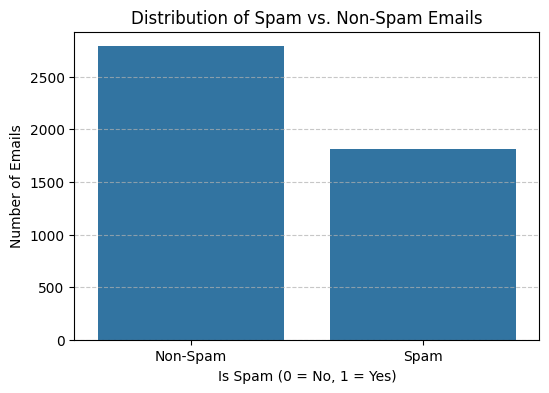


Observation: The dataset is somewhat imbalanced, with more non-spam emails than spam. This is important for model evaluation later.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Class Distribution (Spam vs. Non-Spam) ---")
print(y.value_counts()) # Count occurrences of each class
print("\n--- Percentage of each class ---")
print(y.value_counts(normalize=True) * 100) # Percentage of each class

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Spam vs. Non-Spam Emails')
plt.xlabel('Is Spam (0 = No, 1 = Yes)')
plt.ylabel('Number of Emails')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nObservation: The dataset is somewhat imbalanced, with more non-spam emails than spam. This is important for model evaluation later.")


--- Visualizing Distributions of Selected Scaled Features ---


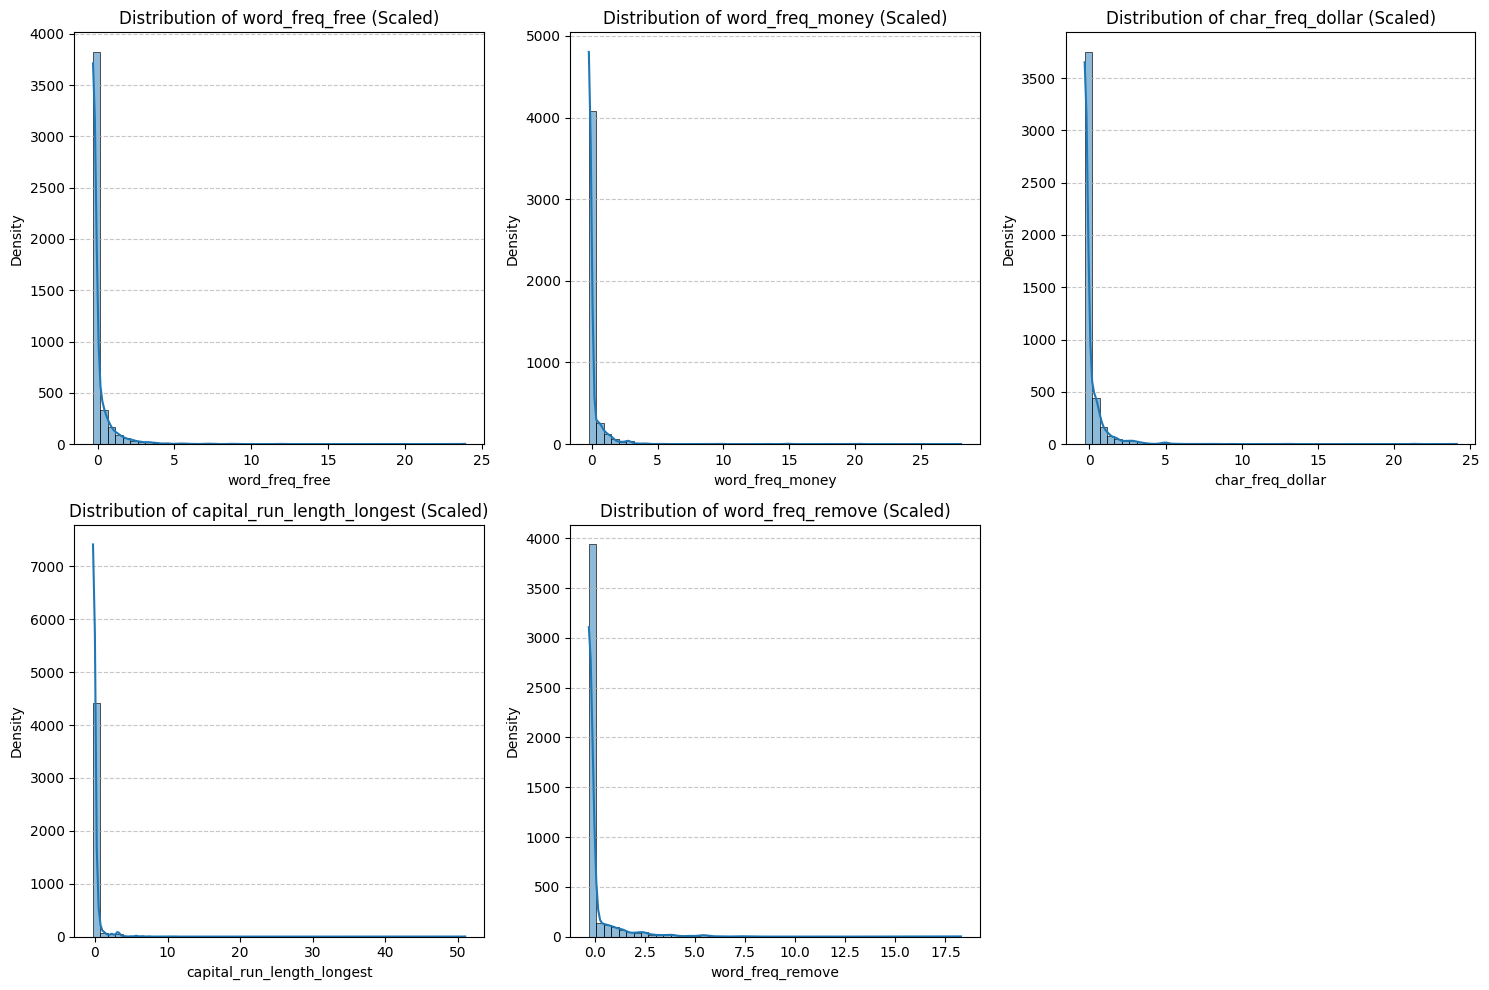


Observation: Some features show skewed distributions even after scaling, which is expected due to their nature (e.g., frequency counts).


In [3]:
# Select a few features to visualize their distributions
# Using X_scaled_df for visualization as it's the prepared data
selected_features = [
    'word_freq_free', 'word_freq_money', 'char_freq_dollar',
    'capital_run_length_longest', 'word_freq_remove'
]

print("\n--- Visualizing Distributions of Selected Scaled Features ---")

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of features
    sns.histplot(X_scaled_df[feature], kde=True, bins=50) # kde for Kernel Density Estimate
    plt.title(f'Distribution of {feature} (Scaled)')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\nObservation: Some features show skewed distributions even after scaling, which is expected due to their nature (e.g., frequency counts).")


--- Correlation Matrix Heatmap of Scaled Features ---


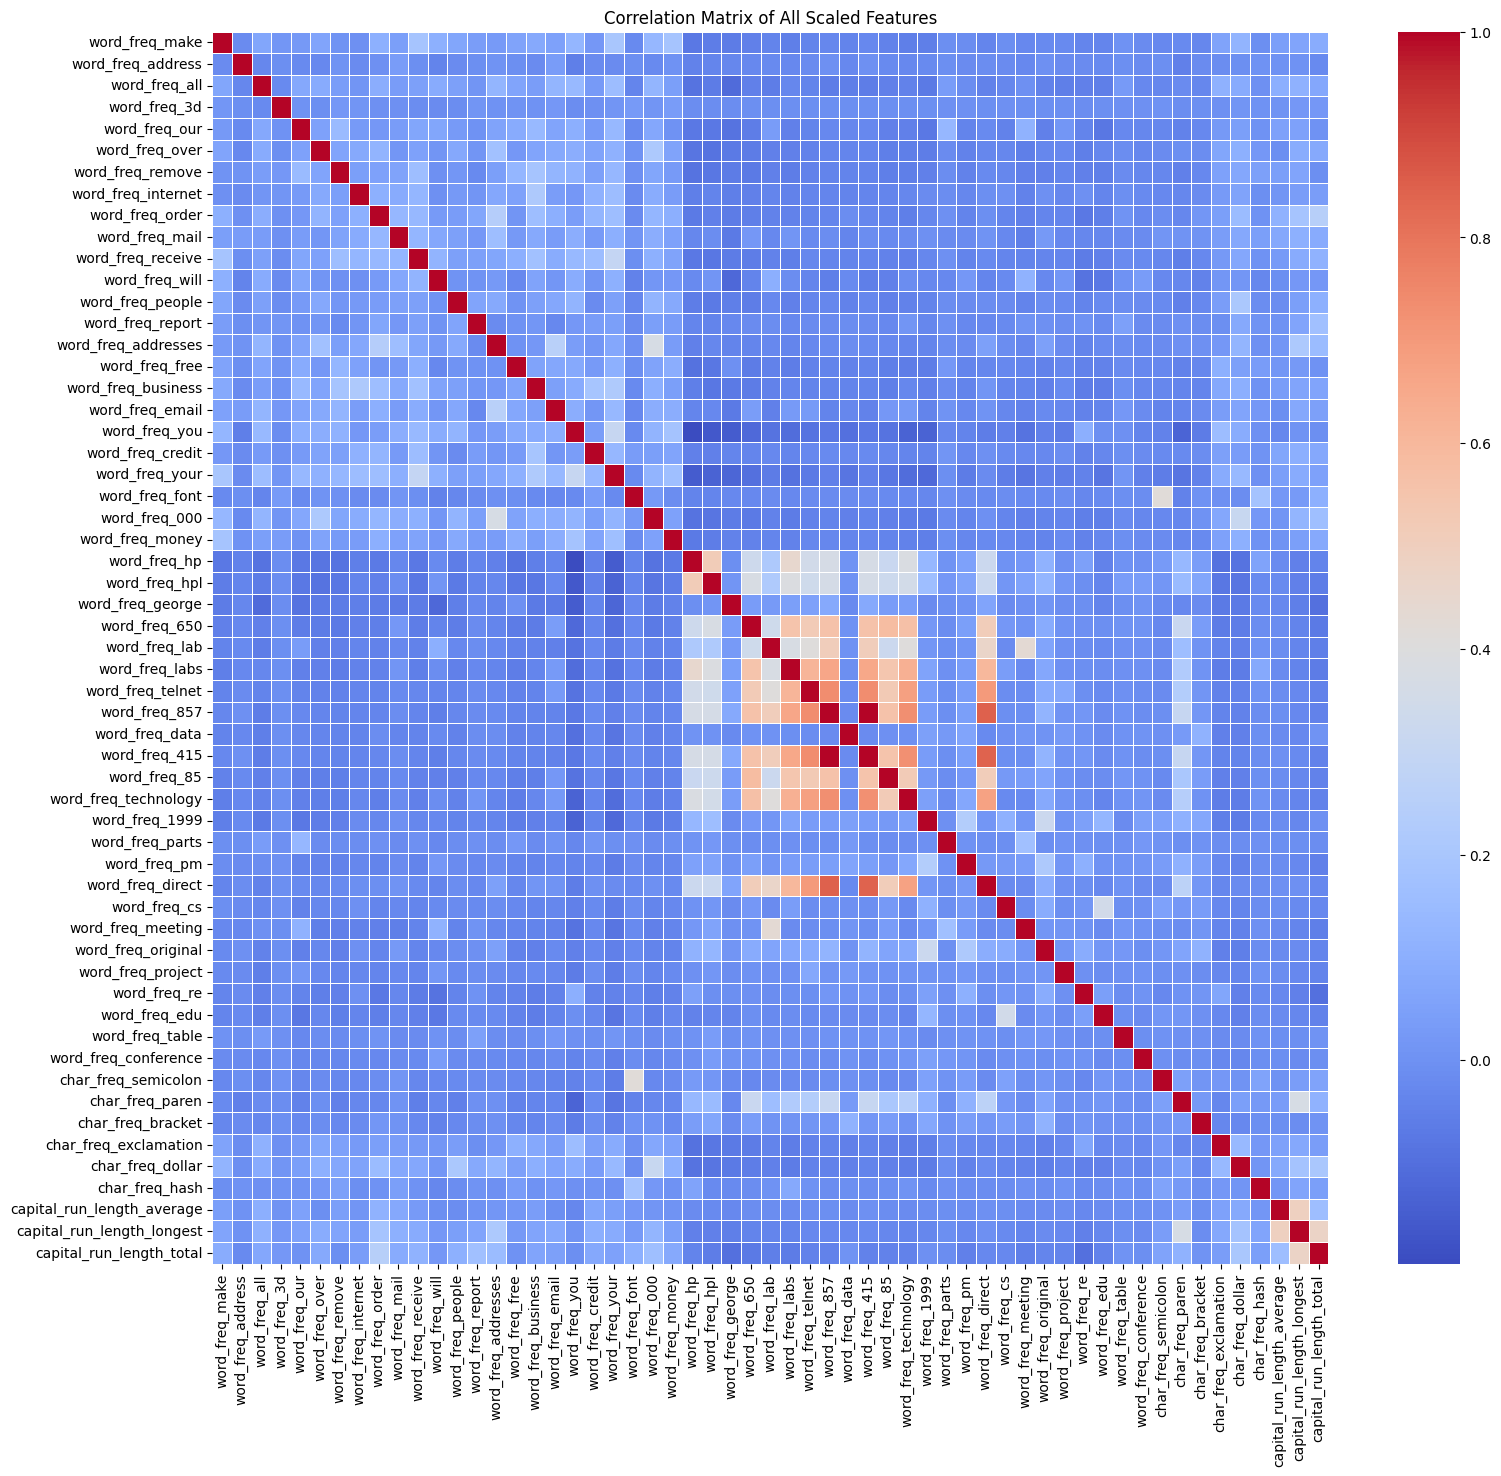


Observation: Look for highly correlated features (values close to 1 or -1). This can inform feature selection or dimensionality reduction later.


In [4]:
print("\n--- Correlation Matrix Heatmap of Scaled Features ---")

# Calculate the correlation matrix
correlation_matrix = X_scaled_df.corr()

plt.figure(figsize=(18, 16)) # Adjust figure size for better readability of many features
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Scaled Features')
plt.show()

print("\nObservation: Look for highly correlated features (values close to 1 or -1). This can inform feature selection or dimensionality reduction later.")


--- Box Plots of Selected Scaled Features vs. Is_Spam ---


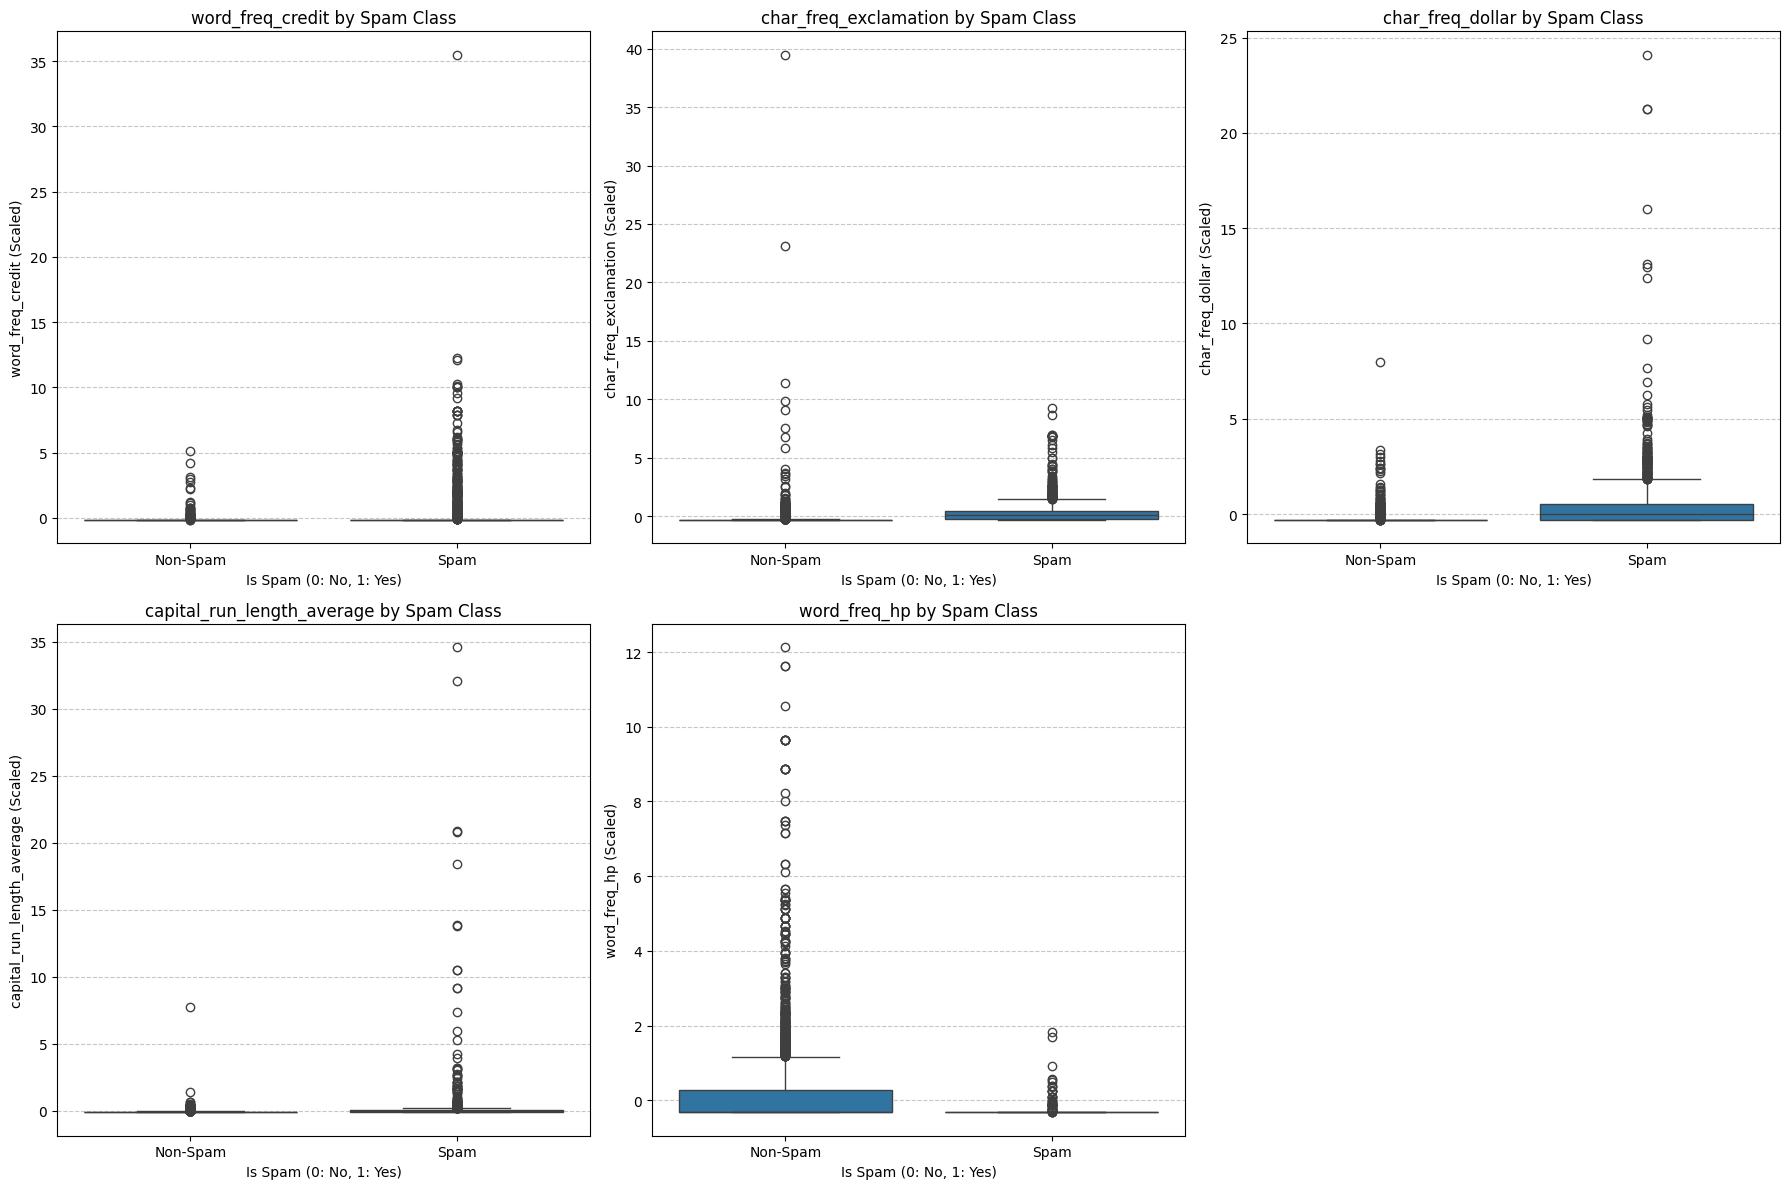


Observation: These plots help identify features where distributions differ significantly between spam and non-spam emails. For example, higher values of 'char_freq_dollar' or 'char_freq_exclamation' might be more common in spam.


In [5]:
print("\n--- Box Plots of Selected Scaled Features vs. Is_Spam ---")

# Combine scaled features and target for plotting
# Make sure to reset index if necessary to align
plot_df = X_scaled_df.copy()
plot_df['is_spam'] = y.values # Directly assign y values assuming index alignment

# Select a few features to create box plots against the target
box_plot_features = [
    'word_freq_credit', 'char_freq_exclamation', 'char_freq_dollar',
    'capital_run_length_average', 'word_freq_hp'
]

plt.figure(figsize=(18, 12))
for i, feature in enumerate(box_plot_features):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid
    sns.boxplot(x='is_spam', y=feature, data=plot_df)
    plt.title(f'{feature} by Spam Class')
    plt.xlabel('Is Spam (0: No, 1: Yes)')
    plt.ylabel(feature + ' (Scaled)')
    plt.xticks([0, 1], ['Non-Spam', 'Spam'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\nObservation: These plots help identify features where distributions differ significantly between spam and non-spam emails. For example, higher values of 'char_freq_dollar' or 'char_freq_exclamation' might be more common in spam.")

--- Starting Basic Modeling Phase ---

Data Split Complete:
Training Features (X_train) shape: (3680, 57)
Testing Features (X_test) shape: (921, 57)
Training Target (y_train) shape: (3680,)
Testing Target (y_test) shape: (921,)

Class distribution in Training Set:
is_spam
0    0.605978
1    0.394022
Name: proportion, dtype: float64

Class distribution in Testing Set:
is_spam
0    0.605863
1    0.394137
Name: proportion, dtype: float64

--- Training Logistic Regression Model ---
Model training complete.

--- Making Predictions on Test Data ---
Predictions complete.

--- Model Evaluation ---

Accuracy: 0.9294

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921


Confusion Matrix:
[[530  28]
 [ 3

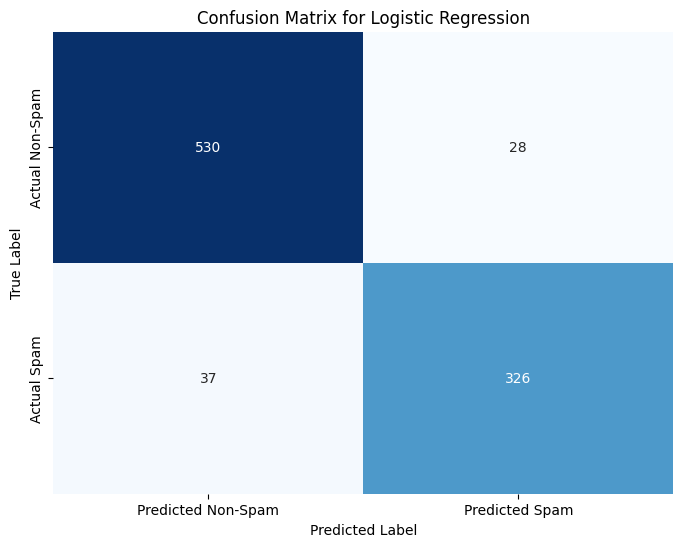


Basic Modeling Phase Complete. Review the metrics to understand your model's performance!
You now have a trained model and an understanding of how well it predicts spam.


In [6]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Starting Basic Modeling Phase ---")

# --- Task 1: Split Data into Training and Testing Sets ---
# We'll use 80% of the data for training and 20% for testing.
# random_state ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nData Split Complete:")
print(f"Training Features (X_train) shape: {X_train.shape}")
print(f"Testing Features (X_test) shape: {X_test.shape}")
print(f"Training Target (y_train) shape: {y_train.shape}")
print(f"Testing Target (y_test) shape: {y_test.shape}")

# Check class distribution in train and test sets to ensure stratification worked
print("\nClass distribution in Training Set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in Testing Set:")
print(y_test.value_counts(normalize=True))


# --- Task 2: Choose and Train a Classification Model (Logistic Regression) ---
print("\n--- Training Logistic Regression Model ---")

# Initialize the Logistic Regression model
# solver='liblinear' is a good choice for small datasets or L1/L2 regularization
# random_state for reproducibility
model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete.")


# --- Task 3: Make Predictions on the Test Data ---
print("\n--- Making Predictions on Test Data ---")

# Predict the target variable for the test set
y_pred = model.predict(X_test)

print("Predictions complete.")


# --- Task 4: Evaluate the Model's Performance ---
print("\n--- Model Evaluation ---")

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Classification Report (Precision, Recall, F1-score for each class)
# Precision: Of all items predicted positive, how many are actually positive?
# Recall: Of all actual positive items, how many were predicted positive?
# F1-score: Harmonic mean of precision and recall.
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
# Helps visualize the performance of a classification model.
# True Positives (TP): Actual Spam, Predicted Spam
# True Negatives (TN): Actual Non-Spam, Predicted Non-Spam
# False Positives (FP): Actual Non-Spam, Predicted Spam (Type I error)
# False Negatives (FN): Actual Spam, Predicted Non-Spam (Type II error)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Spam', 'Predicted Spam'],
            yticklabels=['Actual Non-Spam', 'Actual Spam'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nBasic Modeling Phase Complete. Review the metrics to understand your model's performance!")
print("You now have a trained model and an understanding of how well it predicts spam.")

In [7]:
import joblib
import os

# Define the directory where transformed data (and now models) are saved
transformed_data_dir = r'C:\Users\HomePC\Downloads\spambase_transformed'

# Define the filename for your saved model
model_filename = 'logistic_regression_model.joblib'
model_save_path = os.path.join(transformed_data_dir, model_filename)

print(f"Attempting to save the trained model to: {model_save_path}")

try:
    # Save the trained model
    joblib.dump(model, model_save_path)
    print(f"Model successfully saved to '{model_save_path}'")
except Exception as e:
    print(f"Error saving the model: {e}")

# --- Optional: Verify the saved model by loading it ---
print("\n--- Verifying Model Save (Optional) ---")
try:
    loaded_model = joblib.load(model_save_path)
    print(f"Model successfully loaded from '{model_save_path}' for verification.")

    # You can quickly test it to ensure it works
    # Example: Make a prediction with a single (scaled) test sample
    # Make sure X_test is available from previous cell execution
    if 'X_test' in globals() and not X_test.empty:
        sample_prediction = loaded_model.predict(X_test.iloc[[0]])
        print(f"Prediction for first test sample using loaded model: {sample_prediction[0]}")
    else:
        print("X_test is not available to make a sample prediction with the loaded model.")

except FileNotFoundError:
    print(f"Error: The saved model file was not found at {model_save_path}.")
except Exception as e:
    print(f"An error occurred during model loading verification: {e}")

print("\nModel saving process complete.")

Attempting to save the trained model to: C:\Users\HomePC\Downloads\spambase_transformed\logistic_regression_model.joblib
Model successfully saved to 'C:\Users\HomePC\Downloads\spambase_transformed\logistic_regression_model.joblib'

--- Verifying Model Save (Optional) ---
Model successfully loaded from 'C:\Users\HomePC\Downloads\spambase_transformed\logistic_regression_model.joblib' for verification.
Prediction for first test sample using loaded model: 1

Model saving process complete.
